In [ ]:
# Importación de las librerías necesarias para análisis estadístico y visualización
from scipy.stats import chi2, uniform, norm, expon, t, ttest_ind
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

     Normal   Uniform  Exponential  Heavier Tails
0  1.121404  1.079757     0.529754       2.026881
1  0.948885  0.875045     0.681357       2.585310
2  1.015420  0.825864     0.628387       2.459652
3  1.046574  0.897981     0.723627       2.499191


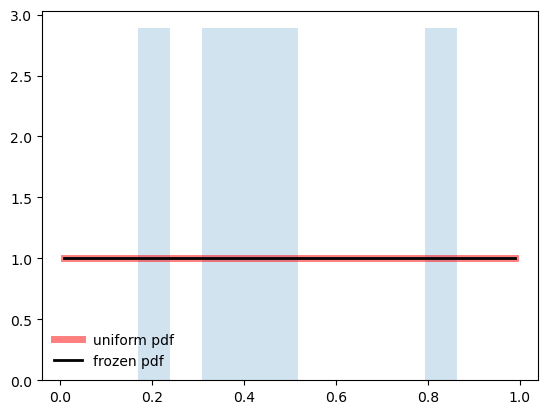

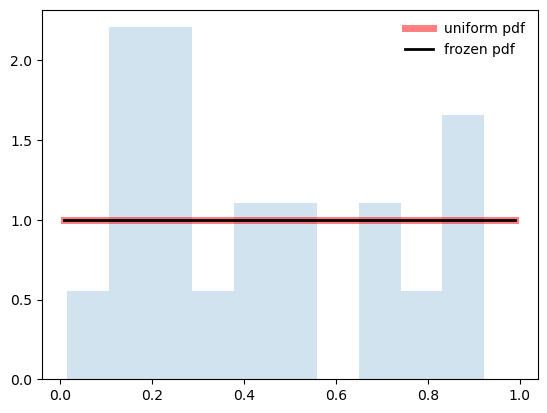

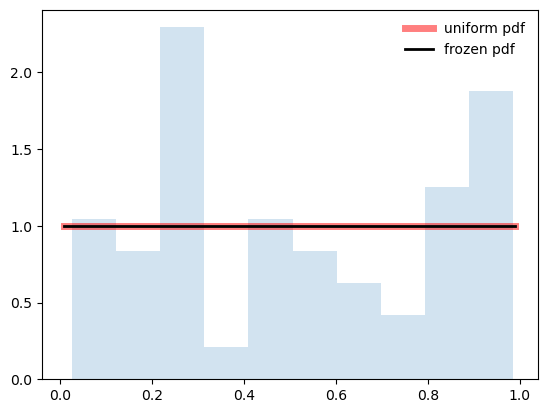

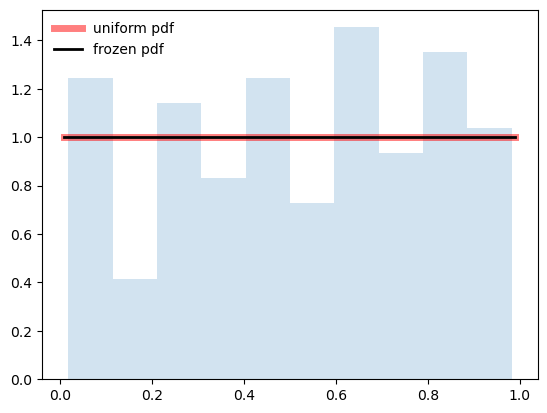

In [4]:
# Definición de variables iniciales
size = 55  # Tamaño de la muestra para los experimentos
muestras = [5, 20, 50, 100]  # Diferentes tamaños de muestra para pruebas

def expo(nz, size=100000):
    """
    Genera una distribución exponencial y calcula una métrica usando la función tp.

    Args:
    nz (int): Grados de libertad para la distribución.
    size (int): Tamaño de la muestra para la generación de la distribución.

    Returns:
    float: Un valor que representa la métrica calculada.
    """
    # Generación de distribuciones exponenciales
    Z1 = expon.rvs(size=size)
    Z = expon.rvs(size=(size, nz))
    Z2 = Z ** 2
    sum_Z2 = np.sum(Z2, axis=1)
    T = Z1 / np.sqrt(sum_Z2 / nz)

    # Cálculo de la métrica
    percent = tp(T, nz)
    return percent

def uniforme(n):
    """
    Genera una distribución uniforme y calcula una métrica usando la función tp.

    Args:
    n (int): Tamaño de la muestra para la generación de la distribución.

    Returns:
    float: Un valor que representa la métrica calculada.
    """
    # Configuración inicial para la visualización de la distribución uniforme
    fig, ax = plt.subplots(1, 1)
    x = np.linspace(uniform.ppf(0.01), uniform.ppf(0.99), 100)
    ax.plot(x, uniform.pdf(x), "r-", lw=5, alpha=0.5, label='uniform pdf')

    # Generación de la distribución uniforme
    rv = uniform()
    ax.plot(x, rv.pdf(x), 'k-', lw=2, label='frozen pdf')
    r = uniform.rvs(size=n)
    ax.hist(r, density=True, histtype='stepfilled', alpha=0.2)
    ax.legend(loc='best', frameon=False)

    # Cálculo de la métrica
    percent = tp(x, n)
    return percent

def ht(n):
    """
    Genera una distribución de colas pesadas (Cauchy) y calcula una métrica usando la función tp.

    Args:
    n (int): Tamaño de la muestra para la generación de la distribución.

    Returns:
    float: Un valor que representa la métrica calculada.
    """
    # Generación de una distribución de Cauchy y truncamiento para mejorar la visualización
    s = np.random.standard_cauchy(n)
    s = s[(s > -25) & (s < 25)]

    # Cálculo de la métrica
    percent = tp(s, n)
    return percent

def tp(muestra, N):
    """
    Calcula una métrica estadística T para dos distribuciones aleatorias.
    
    Args:
    muestra (array): Una distribución de muestras.
    N (int): Tamaño de la muestra.
    
    Returns:
    float: Un valor que representa la métrica calculada.
    """
    # Definición de dos distribuciones aleatorias
    a = np.random.randn(N) + 2
    var_a = a.var(ddof=1)
    var_b = muestra.var(ddof=1)
    
    # Cálculo de la desviación estándar
    s = np.sqrt((var_a + var_b) / 2)
    
    # Cálculo de la estadística T y la prueba T
    t2, p2 = ttest_ind(a, muestra)
    return s

def normal(nz, size=100000):
    """
    Genera una distribución normal y calcula la métrica usando la función tp.
    
    Args:
    nz (int): Grados de libertad para la distribución.
    size (int): Tamaño de la muestra para la generación de la distribución.
    
    Returns:
    float: Un valor que representa la métrica calculada.
    """
    Z1 = norm.rvs(size=size)
    Z = norm.rvs(size=(size, nz))
    Z2 = Z ** 2
    sum_Z2 = np.sum(Z2, axis=1)
    T = Z1 / np.sqrt(sum_Z2 / nz)
    
    # Cálculo de la métrica
    percent = tp(T, nz)
    return percent

# Funciones similares para expo(), uniforme(), y ht()...

def tabla(datos):
    """
    Organiza los resultados de los cálculos en un formato tabular.
    
    Args:
    datos (list): Lista de datos a tabular.
    
    Returns:
    DataFrame: Un DataFrame de pandas que contiene los resultados organizados.
    """
    M1 = np.array(datos)
    # Cálculos adicionales y organización de datos...
    # Creación de un DataFrame para la visualización de los resultados
    grafica = pd.DataFrame(data=M1, columns=['Normal', 'Uniform', 'Exponential', 'Heavier Tails'])
    return grafica

# Cálculo de distribuciones y métricas para diferentes tamaños de muestra
lista = []
for i in muestras:
    distribucion1 = normal(i)
    distribucion2 = expo(i)
    distribucion3 = uniforme(i)
    distribucion4 = ht(i)
    lista.append([distribucion1, distribucion2, distribucion3, distribucion4])

# Creación y visualización de la tabla de resultados
grafica = tabla(lista)
print(grafica)